In [10]:
#libraries we need
#!pip install h2o
#!pip install pydotplus
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
pd.options.mode.chained_assignment = None
import h2o
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from scipy.special import expit


from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

In [21]:
df = pd.read_csv('df_agriculture.csv')

In [22]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [23]:
df.shape

(5364, 13)

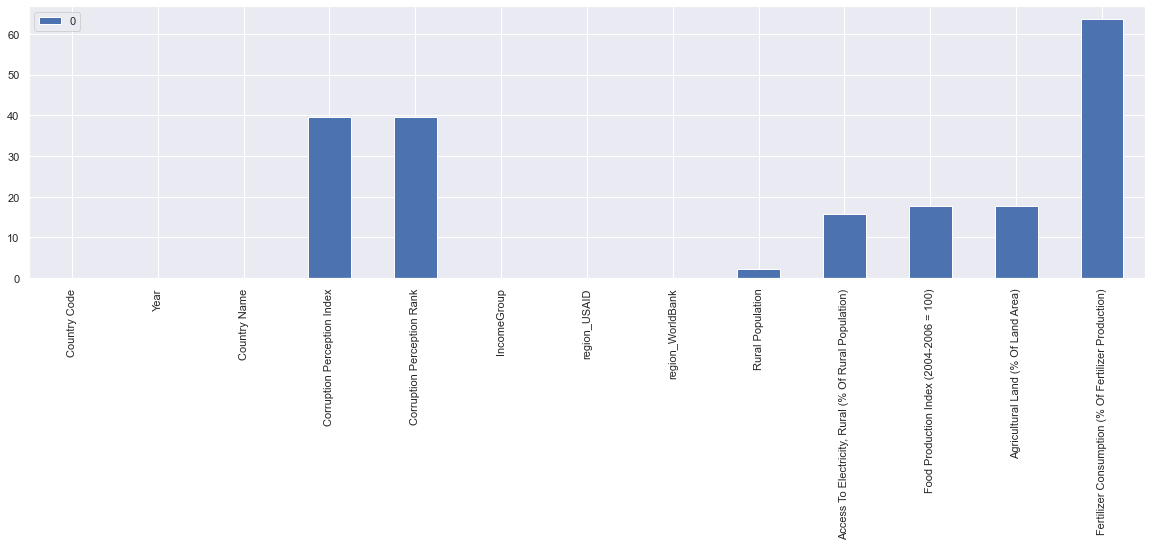

In [24]:
pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))

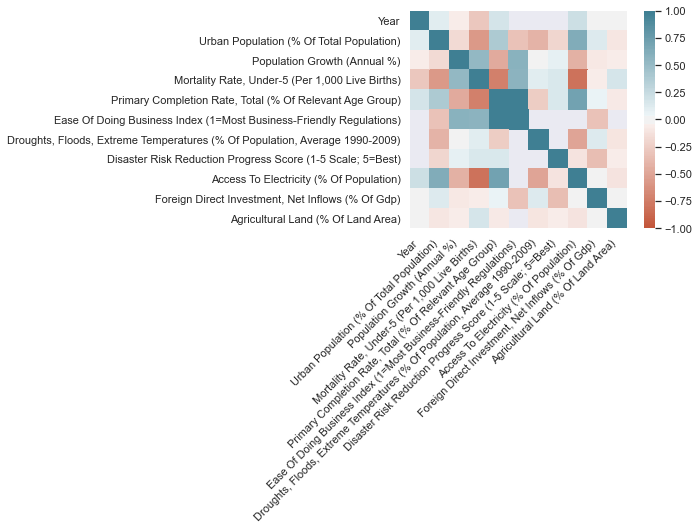

In [14]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [18]:
cor_matrix = df.corr().abs()
#print(cor_matrix)

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                                                    Year  \
Year                                                 NaN   
Urban Population (% Of Total Population)             NaN   
Population Growth (Annual %)                         NaN   
Mortality Rate, Under-5 (Per 1,000 Live Births)      NaN   
Primary Completion Rate, Total (% Of Relevant A...   NaN   
Ease Of Doing Business Index (1=Most Business-F...   NaN   
Droughts, Floods, Extreme Temperatures (% Of Po...   NaN   
Disaster Risk Reduction Progress Score (1-5 Sca...   NaN   
Access To Electricity (% Of Population)              NaN   
Foreign Direct Investment, Net Inflows (% Of Gdp)    NaN   
Agricultural Land (% Of Land Area)                   NaN   

                                                    Urban Population (% Of Total Population)  \
Year                                                                                 0.10979   
Urban Population (% Of Total Population)                                               

Agricultural Land (% Of Land Area)                                                 NaN  


In [20]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)] 
print(to_drop)

['Ease Of Doing Business Index (1=Most Business-Friendly Regulations)']


In [9]:
df_final = df.drop(to_drop, axis=1)
df_final.head()

,Country Code,Year,Country Name,Corruption Perception Index,IncomeGroup,region_USAID,region_WorldBank,Rural Population,"Access To Electricity, Rural (% Of Rural Population)",Food Production Index (2004-2006 = 100),Agricultural Land (% Of Land Area),Fertilizer Consumption (% Of Fertilizer Production)
0,AFG,2000,Afghanistan,NaN,Low income,South and Central Asia (SCA),South Asia,16192155.0,NaN,86.04,57.827099,NaN
1,AFG,2000,Afghanistan,NaN,Low income,South and Central Asia (SCA),South Asia,16192155.0,NaN,86.04,57.827099,NaN
2,AFG,2000,Afghanistan,NaN,Low income,South and Central Asia (SCA),South Asia,16192155.0,NaN,86.04,57.827099,NaN
3,AFG,2000,Afghanistan,NaN,Low income,South and Central Asia (SCA),South Asia,16192155.0,NaN,86.04,57.827099,NaN
4,AFG,2000,Afghanistan,NaN,Low income,South and Central Asia (SCA),South Asia,16192155.0,NaN,86.04,57.827099,NaN


In [ ]:
#Export --  desired name